<a href="https://colab.research.google.com/github/Janindu-Korala/Load-Optimization2D/blob/main/LoadOptimization_Rectangles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches



In [30]:
#the dimensions of the container
W, H = 200, 100

There is a new addition which is the possibility to rotate the rectangle.

In [31]:
class Rectangle:
    def __init__(self, width, height, id):
        self.original_width = width
        self.original_height = height
        self.width = width
        self.height = height
        self.id = id
        self.x = None
        self.y = None
        self.placed = False
        self.rotated = False

    def rotate(self):
        self.width, self.height = self.height, self.width
        self.rotated = not self.rotated

    def area(self):
        return self.width * self.height

In [32]:
def generate_rectangles(n, min_side=10, max_side=30):
    rectangles = [
        Rectangle(random.randint(min_side, max_side),
                  random.randint(min_side, max_side),
                  f"R{i+1}")
        for i in range(n)
    ]
    # Sort by area descending
    rectangles.sort(key=lambda r: r.area(), reverse=True)
    return rectangles


The overlapping logic is same as in squares.

In [33]:
def does_overlap(new_rect, placed_rects, x, y):
    for rect in placed_rects:
        if (x < rect.x + rect.width and x + new_rect.width > rect.x and
            y < rect.y + rect.height and y + new_rect.height > rect.y):
            return True
    return False


In [34]:
def place_rectangles_with_rotation(rectangles):
    placed = []
    candidate_positions = [(0, 0)]

    for rect in rectangles:
        placed_flag = False
        for cx, cy in sorted(candidate_positions, key=lambda p: (p[1], p[0])):   # Bottom-left first (Sort bottom to top, then left to right)

            for rotate in [False, True]:      #First we try without rotating. If it cannot be placed the rectangle is then rotated
                if rotate:
                    rect.rotate()

                if (cx + rect.width <= W and cy + rect.height <= H and
                    not does_overlap(rect, placed, cx, cy)):
                    rect.x, rect.y = cx, cy
                    rect.placed = True
                    placed.append(rect)

                    # Add new positions for future placements
                    candidate_positions.append((cx + rect.width, cy))  # right
                    candidate_positions.append((cx, cy + rect.height))  # top
                    placed_flag = True
                    break

                if rotate:
                    rect.rotate()  # rotate back to original if placement is not successful.

            if placed_flag:
                break

    return placed


(R) inside the rectangle means that rectangle has been rotated.

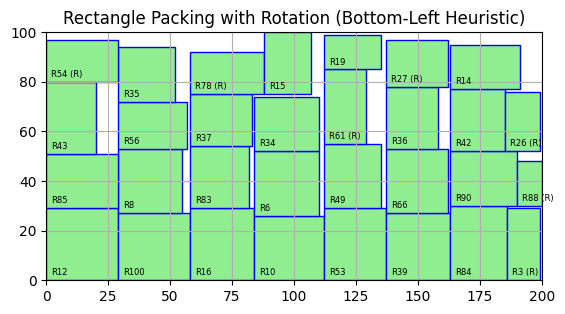

Total wasted area: 2373


In [35]:
def visualize_packing(rectangles):
    fig, ax = plt.subplots()
    ax.set_xlim(0, W)
    ax.set_ylim(0, H)
    ax.set_title("Rectangle Packing with Rotation")
    for rect in rectangles:
        if rect.placed:
            patch = patches.Rectangle((rect.x, rect.y), rect.width, rect.height,
                                      linewidth=1, edgecolor='blue', facecolor='lightgreen')
            ax.add_patch(patch)
            label = rect.id + (" (R)" if rect.rotated else "")
            ax.text(rect.x + 2, rect.y + 2, label, fontsize=6)
    ax.set_aspect('equal')
    plt.grid(True)
    plt.show()

def calculate_wasted_area(rectangles):
    used_area = sum(rect.area() for rect in rectangles if rect.placed)
    total_area = W * H
    return total_area - used_area

rectangles = generate_rectangles(n=100)
placed_rectangles = place_rectangles_with_rotation(rectangles)
visualize_packing(placed_rectangles)
wasted = calculate_wasted_area(placed_rectangles)
print("Total wasted area:", wasted)